In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

# Load the iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Display the first few rows of the dataset
print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [11]:
#2.2
# Load the Iris dataset
iris = load_iris()

# Calculate variance and standard deviation of petal widths
petal_widths = iris.data[:, 3]  # Petal width is the 4th column (index 3)
petal_width_variance = np.var(petal_widths)
petal_width_std_dev = np.std(petal_widths)

# Display the results
print(f"Variance of petal widths: {petal_width_variance:.2f}")
print(f"Standard deviation of petal widths: {petal_width_std_dev:.2f}")


Variance of petal widths: 0.58
Standard deviation of petal widths: 0.76


In [12]:
#2.3
# Load the Iris dataset
iris = load_iris()

# Create a pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Calculate statistics for all numerical features
summary_table = pd.DataFrame()
summary_table['Feature'] = iris_df.columns
summary_table['Mean'] = iris_df.mean().values
summary_table['Median'] = iris_df.median().values
summary_table['Variance'] = iris_df.var().values
summary_table['Std Deviation'] = iris_df.std().values

# Display the summary table
print("Summary Table for Iris Dataset:")
print(summary_table)


Summary Table for Iris Dataset:
             Feature      Mean  Median  Variance  Std Deviation
0  sepal length (cm)  5.843333    5.80  0.685694       0.828066
1   sepal width (cm)  3.057333    3.00  0.189979       0.435866
2  petal length (cm)  3.758000    4.35  3.116278       1.765298
3   petal width (cm)  1.199333    1.30  0.581006       0.762238


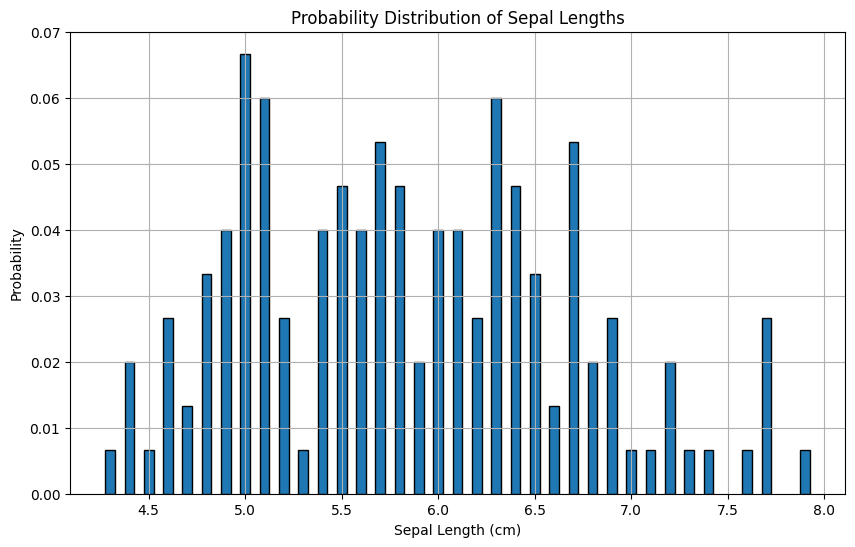

In [14]:
#2.4
# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Define the random variable (sepal length)
sepal_length = iris_df['sepal length (cm)']

# Calculate the probability distribution (empirical)
probability_distribution = sepal_length.value_counts(normalize=True).sort_index()

# Plot the probability distribution
plt.figure(figsize=(10, 6))
plt.bar(probability_distribution.index, probability_distribution.values, width=0.05, edgecolor='black')
plt.title('Probability Distribution of Sepal Lengths')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Probability')
plt.grid(True)
plt.show()


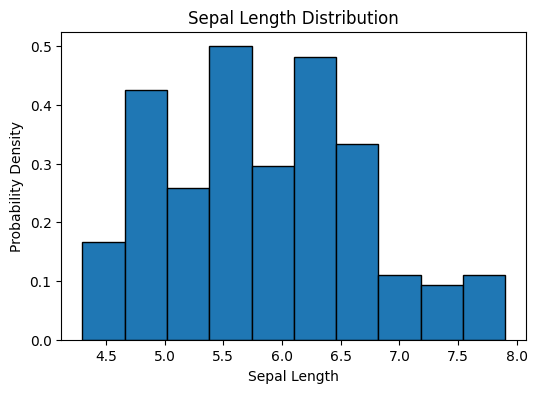

In [16]:
# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Plotting the histogram
plt.figure(figsize=(6, 4))
plt.hist(iris_df['sepal length (cm)'], bins=10, edgecolor='black', density=True)
plt.xlabel('Sepal Length')
plt.ylabel('Probability Density')
plt.title('Sepal Length Distribution')
plt.show()

In [18]:
# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Calculate histogram
counts, bin_edges = np.histogram(iris_df['petal length (cm)'], bins=10, density=False)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
probabilities = counts / iris_df.shape[0]
cdf = np.cumsum(probabilities)

# Create DataFrame for results
result_df = pd.DataFrame({'Bin Centers': bin_centers, 'Probability': probabilities, 'CDF': cdf})
print(result_df.head(10))

   Bin Centers  Probability       CDF
0        1.295     0.246667  0.246667
1        1.885     0.086667  0.333333
2        2.475     0.000000  0.333333
3        3.065     0.020000  0.353333
4        3.655     0.053333  0.406667
5        4.245     0.173333  0.580000
6        4.835     0.193333  0.773333
7        5.425     0.120000  0.893333
8        6.015     0.073333  0.966667
9        6.605     0.033333  1.000000


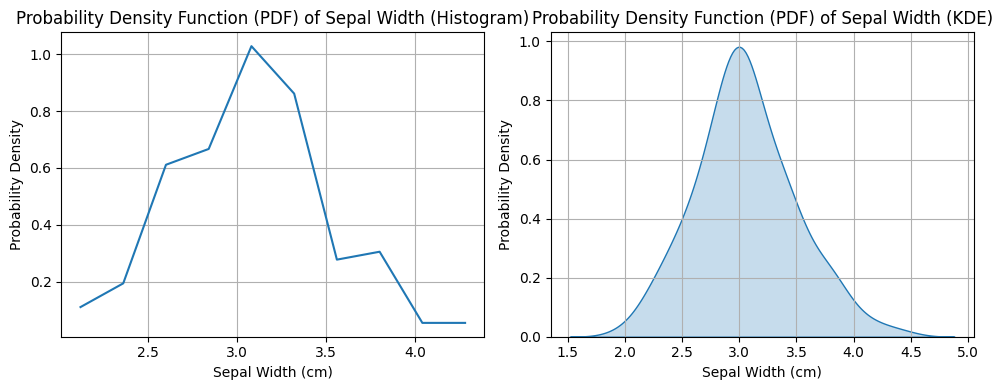

In [20]:
# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Calculate PDF using histogram
counts, bin_edges = np.histogram(iris_df['sepal width (cm)'], bins=10, density=False)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
bin_widths = bin_edges[1:] - bin_edges[:-1]
pdf = counts / (sum(counts) * bin_widths)  # Normalize to get probabilities

# Plotting the PDF
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(bin_centers, pdf)
axs[0].set_xlabel('Sepal Width (cm)')
axs[0].set_ylabel('Probability Density')
axs[0].set_title('Probability Density Function (PDF) of Sepal Width (Histogram)')
axs[0].grid(True)

# Calculating PDF using seaborn's kdeplot
sns.kdeplot(iris_df['sepal width (cm)'], fill=True, ax=axs[1])
axs[1].set_xlabel('Sepal Width (cm)')
axs[1].set_ylabel('Probability Density')
axs[1].set_title('Probability Density Function (PDF) of Sepal Width (KDE)')
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [30]:
print(result_df.head(12))

#for random selection just assign a random function that would return any value within specified range rest code remains the same
given_value = float(input("Enter the value = "))

# Find the bin index where the given value falls
#searchsorted is tecvhnically used to find the index where the data should be inserted but it also returns that index so actually we are using this 
#function to find us the bin where the given value should be 

bin_index = np.searchsorted(result_df['Bin Centers'], given_value, side='right') - 1
print(f"Bin Index = {bin_index}")
# If the given value is larger than any bin center, handle it separately
if bin_index >= len(result_df):
    probability_greater_than_given = 0.0
else:
    #This will retrieve the cumulative distribution function (CDF) value at the bin_index from the result_df dataframe
    cdf_value = result_df.loc[bin_index, 'CDF']
    print(f"CDF Value = {cdf_value:.4f}")
    # Calculate the probability of petal length greater than the given value
    probability_greater_than_given = 1 - cdf_value

print(f"Probability of petal length > {given_value} cm: {probability_greater_than_given:.2f}")

   Bin Centers  Probability       CDF
0        1.295     0.246667  0.246667
1        1.885     0.086667  0.333333
2        2.475     0.000000  0.333333
3        3.065     0.020000  0.353333
4        3.655     0.053333  0.406667
5        4.245     0.173333  0.580000
6        4.835     0.193333  0.773333
7        5.425     0.120000  0.893333
8        6.015     0.073333  0.966667
9        6.605     0.033333  1.000000


In [ ]:
# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Filtering the dataset for the two species
setosa_petal_length = iris_df[iris_df['species'] == 0]['petal length (cm)']
versicolor_petal_length = iris_df[iris_df['species'] == 1]['petal length (cm)']

# Performing an independent t-test
t_stat, p_value = stats.ttest_ind(setosa_petal_length, versicolor_petal_length)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Determining if the null hypothesis can be rejected
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean petal lengths between the two species.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean petal lengths between the two species.")


T-statistic: -39.49
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in the mean petal lengths between the two species.


T-statistic: -39.49
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in the mean petal lengths between the two species.


In [29]:
# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Calculating covariance
cov_matrix = np.cov(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'])
cov_sepal_length_width = cov_matrix[0, 1]

# Calculating correlation
corr_matrix = np.corrcoef(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'])
corr_sepal_length_width = corr_matrix[0, 1]

print(f"Covariance between sepal length and sepal width: {cov_sepal_length_width:.2f}")
print(f"Correlation between sepal length and sepal width: {corr_sepal_length_width:.2f}")

# Interpretating of the results
if corr_sepal_length_width > 0:
    relation = "positively"
elif corr_sepal_length_width < 0:
    relation = "negatively"
else:
    relation = "no"

print(f"The sepal length and sepal width are {relation} correlated.")

Covariance between sepal length and sepal width: -0.04
Correlation between sepal length and sepal width: -0.12
The sepal length and sepal width are negatively correlated.
